#**Air Traffic Insights**

**Connect to drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Install Requirements**

In [ ]:
!apt-get install sqlite3
!pip install pandas numpy matplotlib seaborn
!pip install tabulate

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Suggested packages:
  sqlite3-doc
The following NEW packages will be installed:
  sqlite3
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 769 kB of archives.
After this operation, 1,874 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 sqlite3 amd64 3.37.2-2ubuntu0.5 [769 kB]
Fetched 769 kB in 0s (5,932 kB/s)
Selecting previously unselected package sqlite3.
(Reading database ... 126435 files and directories currently installed.)
Preparing to unpack .../sqlite3_3.37.2-2ubuntu0.5_amd64.deb ...
Unpacking sqlite3 (3.37.2-2ubuntu0.5) ...
Setting up sqlite3 (3.37.2-2ubuntu0.5) ...
Processing triggers for man-db (2.10.2-1) ...


**Import Libraries**

In [ ]:
import sqlite3
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

In [ ]:
conn=sqlite3.connect('Airline.db')

In [ ]:
#Define the connect path for the database
db_path='/content/drive/MyDrive/Airline_Project/airline.db'

In [ ]:
db_folder='/content/drive/MyDrive/Airline_Project/sqlite'
os.makedirs(db_folder,exist_ok=True) #ensure the folder exist
db_path=os.path.join(db_folder,'Airline.db')

conn=sqlite3.connect(db_path)
cursor=conn.cursor()

print('Database connected at:',db_path)

Database connected at: /content/drive/MyDrive/Airline_Project/sqlite/Airline.db


##**Pandas**

**Load Data**

In [ ]:
#load data into pandas
data=pd.read_csv('/content/drive/MyDrive/Airline_Project/airlines_flights_data.csv')

In [ ]:
#Display top 5 rows
data.head()

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [ ]:
#display number of rows and cols
data.shape

(300153, 12)

In [ ]:
#detailed info of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [ ]:
# check null values if any
data.isna().any()

,0
index,False
airline,False
flight,False
source_city,False
departure_time,False
stops,False
arrival_time,False
destination_city,False
class,False
duration,False


In [ ]:
#Check Duplicate data
data.duplicated().sum()

np.int64(0)

##**SQL**

**Load Data**

In [ ]:
#load data into sql
data.to_sql("AirlineTable", conn, if_exists="replace", index=False)

300153

Display Data

In [ ]:
#Fetch data
cursor.execute('''SELECT * FROM AirlineTable
                  LIMIT 10;
              ''')
rows=cursor.fetchall()

#coloum names
coloum_names=[desc[0] for desc in cursor.description]

#print table
print(tabulate(rows,headers=coloum_names,tablefmt='grid'))

+---------+-----------+----------+---------------+------------------+---------+----------------+--------------------+---------+------------+-------------+---------+
|   index | airline   | flight   | source_city   | departure_time   | stops   | arrival_time   | destination_city   | class   |   duration |   days_left |   price |
+=========+===========+==========+===============+==================+=========+================+====================+=========+============+=============+=========+
|       0 | SpiceJet  | SG-8709  | Delhi         | Evening          | zero    | Night          | Mumbai             | Economy |       2.17 |           1 |    5953 |
+---------+-----------+----------+---------------+------------------+---------+----------------+--------------------+---------+------------+-------------+---------+
|       1 | SpiceJet  | SG-8157  | Delhi         | Early_Morning    | zero    | Morning        | Mumbai             | Economy |       2.33 |           1 |    5953 |
+---------

Display Number of Rows

In [ ]:
#Fetch data
cursor.execute('''SELECT COUNT(*) AS Rows
                  FROM AirlineTable;
              ''')
rows=cursor.fetchall()

#coloum names
coloum_names=[desc[0] for desc in cursor.description]

#print table
print(tabulate(rows,headers=coloum_names,tablefmt='grid'))

+--------+
|   Rows |
+========+
| 300153 |
+--------+


##**Visualizations**

**1.Price Distribution across Airlines**

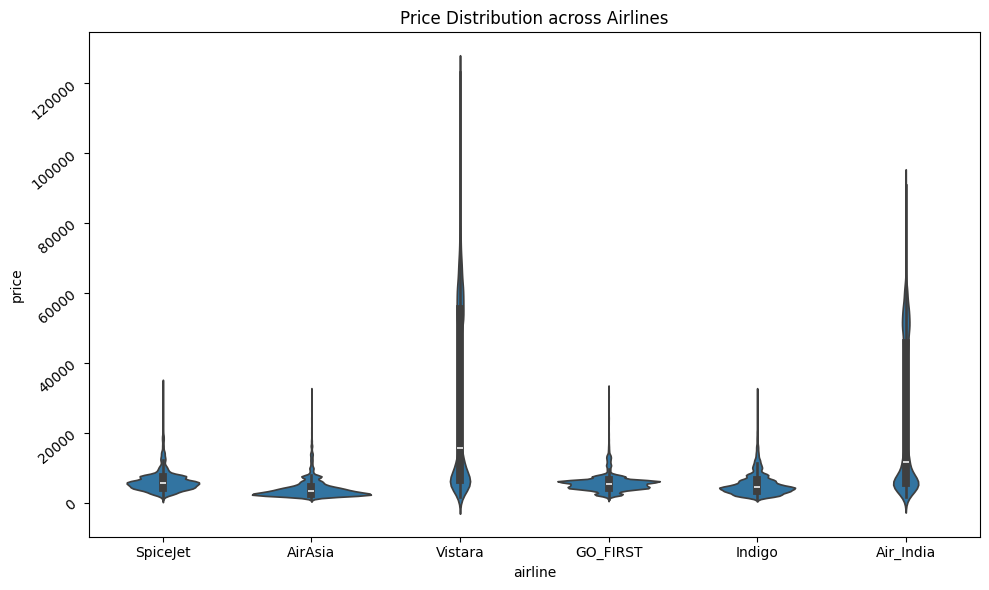

In [ ]:
plt.figure(figsize=(10,6))
sns.violinplot(data=data,x='airline',y='price')
plt.yticks(rotation=40)
plt.title('Price Distribution across Airlines')
plt.tight_layout()
plt.show()

**2.Average Price: Economy vs. Business Class**

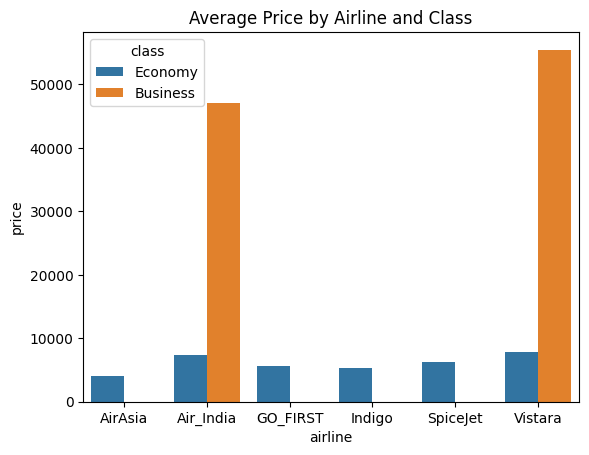

In [ ]:
avg_price = data.groupby(['class')['price'].mean().reset_index()
#print(avg_price)
sns.barplot(data=avg_price, x='airline', y='price', hue='class')
plt.title('Average Price by Airline and Class')
plt.show()

**3.Busiest Source & Destination Cities**

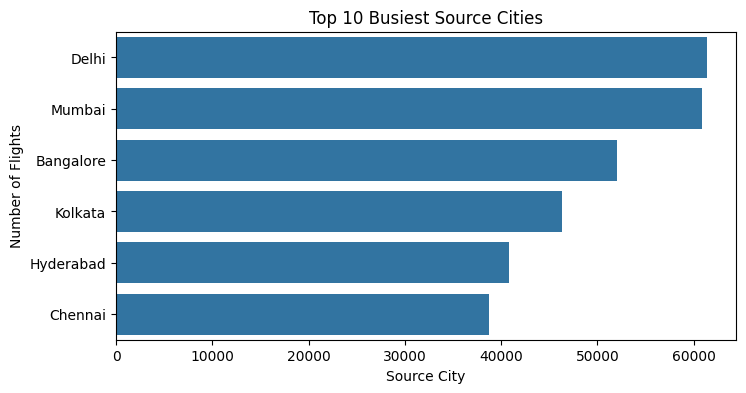

In [ ]:
# Get the top source cities
top_source_cities = data['source_city'].value_counts().nlargest(10).reset_index()
top_source_cities.columns = ['source_city', 'count']

plt.figure(figsize=(8, 4))
sns.barplot(data=top_source_cities, x='count', y='source_city')
plt.title('Top 10 Busiest Source Cities')
plt.xlabel('Source City')
plt.ylabel('Number of Flights')
plt.show()

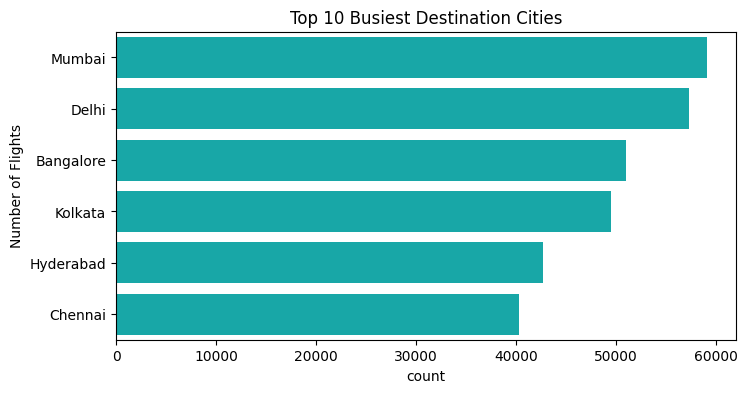

In [ ]:
# Get the top destination cities
top_destination_cities = data['destination_city'].value_counts().nlargest(10).reset_index()
top_destination_cities.columns = ['destination_city', 'count']

plt.figure(figsize=(8,4))
sns.barplot(data=top_destination_cities, x='count', y='destination_city',color='c')
plt.title('Top 10 Busiest Destination Cities')
plt.ylabel('Number of Flights')
plt.show()

**4.Days Left vs. Ticket Price Trend**

<Axes: xlabel='days_left', ylabel='price'>

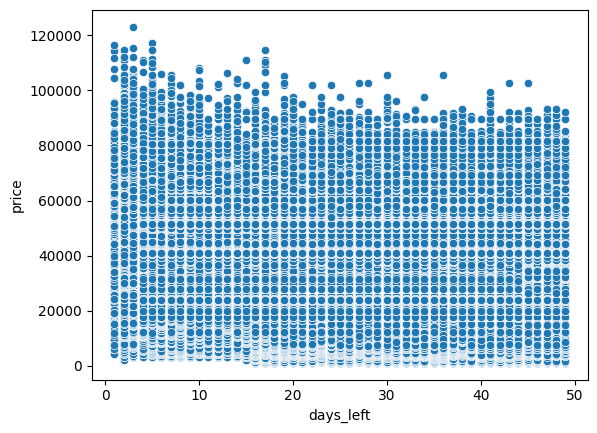

In [ ]:
sns.scatterplot(data=data,x='days_left',y='price')

##**SQL Queries**

**1.  Find the average ticket price per airline**

In [ ]:
#Fetch data
cursor.execute('''
        SELECT airline,
               ROUND(AVG(price)) AS Avg_Price
        FROM AirlineTable
        GROUP BY airline;
              ''')
rows=cursor.fetchall()

#coloum names
coloum_names=[desc[0] for desc in cursor.description]

#print table
print(tabulate(rows,headers=coloum_names,tablefmt='grid'))

+-----------+-------------+
| airline   |   Avg_Price |
+===========+=============+
| AirAsia   |        4091 |
+-----------+-------------+
| Air_India |       23507 |
+-----------+-------------+
| GO_FIRST  |        5652 |
+-----------+-------------+
| Indigo    |        5324 |
+-----------+-------------+
| SpiceJet  |        6179 |
+-----------+-------------+
| Vistara   |       30397 |
+-----------+-------------+


**2. List the top 5 most expensive routes (source to destination)**

In [ ]:
#Fetch data
cursor.execute('''
       SELECT airline,source_city,destination_city,
              ROUND(AVG(price)) AS Price
       FROM AirlineTable
       GROUP BY source_city,destination_city
       ORDER BY Price DESC
       LIMIT 5;
              ''')
rows=cursor.fetchall()

#coloum names
coloum_names=[desc[0] for desc in cursor.description]

#print table
print(tabulate(rows,headers=coloum_names,tablefmt='grid'))

+-----------+---------------+--------------------+---------+
| airline   | source_city   | destination_city   |   Price |
+===========+===============+====================+=========+
| Indigo    | Chennai       | Bangalore          |   25082 |
+-----------+---------------+--------------------+---------+
| SpiceJet  | Kolkata       | Chennai            |   23660 |
+-----------+---------------+--------------------+---------+
| AirAsia   | Bangalore     | Kolkata            |   23500 |
+-----------+---------------+--------------------+---------+
| Indigo    | Bangalore     | Chennai            |   23322 |
+-----------+---------------+--------------------+---------+
| GO_FIRST  | Mumbai        | Bangalore          |   23148 |
+-----------+---------------+--------------------+---------+


**3. Which airline offers the lowest average ticket price for Business class?**

In [ ]:
#Fetch data
cursor.execute('''
       SELECT airline,
              ROUND(MIN(price)) AS Min_Price
       FROM AirlineTable
       WHERE class = 'Business'
       GROUP BY airline
       ORDER BY Min_Price
       LIMIT 1;
              ''')
rows=cursor.fetchall()

#coloum names
coloum_names=[desc[0] for desc in cursor.description]

#print table
print(tabulate(rows,headers=coloum_names,tablefmt='grid'))

+-----------+-------------+
| airline   |   Min_Price |
+===========+=============+
| Air_India |       12000 |
+-----------+-------------+


**4. Find routes with more than 50 flights and their average ticket prices.**

In [ ]:
 #Fetch data
cursor.execute('''
        SELECT airline,source_city,destination_city,
               COUNT(flight) AS Total_Flights,
               ROUND(AVG(price)) AS Avg_Price
        FROM AirlineTable
        GROUP BY source_city,destination_city
        HAVING COUNT(flight) > 50;
              ''')
rows=cursor.fetchall()

#coloum names
coloum_names=[desc[0] for desc in cursor.description]

#print table
print(tabulate(rows,headers=coloum_names,tablefmt='grid'))

+-----------+---------------+--------------------+-----------------+-------------+
| airline   | source_city   | destination_city   |   Total_Flights |   Avg_Price |
+===========+===============+====================+=================+=============+
| Indigo    | Bangalore     | Chennai            |            6410 |       23322 |
+-----------+---------------+--------------------+-----------------+-------------+
| AirAsia   | Bangalore     | Delhi              |           13756 |       17723 |
+-----------+---------------+--------------------+-----------------+-------------+
| AirAsia   | Bangalore     | Hyderabad          |            8928 |       21226 |
+-----------+---------------+--------------------+-----------------+-------------+
| AirAsia   | Bangalore     | Kolkata            |           10028 |       23500 |
+-----------+---------------+--------------------+-----------------+-------------+
| Vistara   | Bangalore     | Mumbai             |           12939 |       23129 |
+---

**5. Compare average price difference between Economy and Business class per airline**

In [ ]:
#Fetch data
cursor.execute('''
       SELECT airline,
              AVG(CASE WHEN class = "Economy" THEN price END) AS Avg_Economy,
              AVG(CASE WHEN class = "Business" THEN price END) AS Avg_Busniess,
              (AVG(CASE WHEN class = "Economy" THEN price END) -
              AVG(CASE WHEN class = "Business" THEN price END))AS price_diff
       FROM airlineTable
       GROUP BY airline;
              ''')
rows=cursor.fetchall()

#coloum names
coloum_names=[desc[0] for desc in cursor.description]

#print table
print(tabulate(rows,headers=coloum_names,tablefmt='grid'))

+-----------+---------------+----------------+--------------+
| airline   |   Avg_Economy |   Avg_Busniess |   price_diff |
+===========+===============+================+==============+
| AirAsia   |       4091.07 |                |              |
+-----------+---------------+----------------+--------------+
| Air_India |       7313.68 |          47131 |     -39817.4 |
+-----------+---------------+----------------+--------------+
| GO_FIRST  |       5652.01 |                |              |
+-----------+---------------+----------------+--------------+
| Indigo    |       5324.22 |                |              |
+-----------+---------------+----------------+--------------+
| SpiceJet  |       6179.28 |                |              |
+-----------+---------------+----------------+--------------+
| Vistara   |       7806.94 |          55477 |     -47670.1 |
+-----------+---------------+----------------+--------------+


**6. Which cities have the most incoming flights?**

In [ ]:
#Fetch data
cursor.execute('''
        SELECT destination_city AS City,
               COUNT(flight) AS Incoming_Flights
        FROM AirlineTable
        GROUP BY destination_city
        ORDER BY Incoming_Flights DESC;
              ''')
rows=cursor.fetchall()

#coloum names
coloum_names=[desc[0] for desc in cursor.description]

#print table
print(tabulate(rows,headers=coloum_names,tablefmt='grid'))

+-----------+--------------------+
| City      |   Incoming_Flights |
+===========+====================+
| Mumbai    |              59097 |
+-----------+--------------------+
| Delhi     |              57360 |
+-----------+--------------------+
| Bangalore |              51068 |
+-----------+--------------------+
| Kolkata   |              49534 |
+-----------+--------------------+
| Hyderabad |              42726 |
+-----------+--------------------+
| Chennai   |              40368 |
+-----------+--------------------+


**7. Which cities have the most outgoing flights?**

In [ ]:
#Fetch data
cursor.execute('''
        SELECT source_city AS City,
               COUNT(flight) AS Outgoing_Flights
        FROM AirlineTable
        GROUP BY source_city
        ORDER BY COUNT(flight) DESC;
              ''')
rows=cursor.fetchall()

#coloum names
coloum_names=[desc[0] for desc in cursor.description]

#print table
print(tabulate(rows,headers=coloum_names,tablefmt='grid'))

+-----------+--------------------+
| City      |   Outgoing_Flights |
+===========+====================+
| Delhi     |              61343 |
+-----------+--------------------+
| Mumbai    |              60896 |
+-----------+--------------------+
| Bangalore |              52061 |
+-----------+--------------------+
| Kolkata   |              46347 |
+-----------+--------------------+
| Hyderabad |              40806 |
+-----------+--------------------+
| Chennai   |              38700 |
+-----------+--------------------+


**8. Find the busiest route (most number of flights)**

In [ ]:
#Fetch data
cursor.execute('''
        SELECT source_city,destination_city,
               COUNT(flight) AS Total_Flights
        FROM AirlineTable
        GROUP BY source_city,destination_city
        ORDER BY Total_Flights DESC
        LIMIT 3;
              ''')
rows=cursor.fetchall()

#coloum names
coloum_names=[desc[0] for desc in cursor.description]

#print table
print(tabulate(rows,headers=coloum_names,tablefmt='grid'))

+---------------+--------------------+-----------------+
| source_city   | destination_city   |   Total_Flights |
+===============+====================+=================+
| Delhi         | Mumbai             |           15289 |
+---------------+--------------------+-----------------+
| Mumbai        | Delhi              |           14809 |
+---------------+--------------------+-----------------+
| Delhi         | Bangalore          |           14012 |
+---------------+--------------------+-----------------+


**9. List the top 3 airlines with cheapest average prices for each route**

In [1]:
#Fetch data
cursor.execute('''
        SELECT source_city,destination_city,airline,
               ROUND(AVG(price)) AS Avg_Price
        FROM AirlineTable
        GROUP BY source_city,destination_city,airline
        -- ORDER BY Avg_Price DESC;
              ''')
rows=cursor.fetchall()

#coloum names
coloum_names=[desc[0] for desc in cursor.description]

#print table
print(tabulate(rows,headers=coloum_names,tablefmt='grid'))

NameError: name 'cursor' is not defined

**10. Find flights with duration more than 5 hours but priced below average**

In [ ]:
#Fetch data
cursor.execute('''
        SELECT airline,flight,duration,
              ROUND(AVG(price)) AS Avg_Price,price
        FROM AirlineTable
        WHERE duration > 5
        GROUP BY duration
        HAVING price < Avg_Price;
              ''')
rows=cursor.fetchall()

#coloum names
coloum_names=[desc[0] for desc in cursor.description]

#print table
print(tabulate(rows,headers=coloum_names,tablefmt='grid'))

+-----------+-----------+------------+-------------+---------+
| airline   | flight    |   duration |   Avg_Price |   price |
+===========+===========+============+=============+=========+
| GO_FIRST  | G8-404    |       5.17 |       16095 |    5886 |
+-----------+-----------+------------+-------------+---------+
| AirAsia   | I5-744    |       5.25 |       14021 |    7423 |
+-----------+-----------+------------+-------------+---------+
| Indigo    | 6E-5063   |       5.42 |       14309 |   13279 |
+-----------+-----------+------------+-------------+---------+
| AirAsia   | I5-747    |       5.58 |       17596 |    5949 |
+-----------+-----------+------------+-------------+---------+
| Air_India | AI-885    |       5.67 |       17245 |   14250 |
+-----------+-----------+------------+-------------+---------+
| AirAsia   | I5-744    |       5.83 |       12873 |    8869 |
+-----------+-----------+------------+-------------+---------+
| Indigo    | 6E-2373   |       6    |       19365 |   

**11. Which flight class shows the highest average price variation (std deviation)?**

In [ ]:
cursor.execute('''
        SELECT class,
               SQRT(AVG(price * price) - AVG(price) * AVG(price)) AS price_stddev
        FROM AirlineTable
        GROUP BY class
        ORDER BY price_stddev DESC
        LIMIT 1;
              ''')
rows=cursor.fetchall()
coloum_names=[desc[0] for desc in cursor.description]
print(tabulate(rows,headers=coloum_names,tablefmt='grid'))

+----------+----------------+
| class    |   price_stddev |
+==========+================+
| Business |        12969.2 |
+----------+----------------+
